In [40]:
import pickle
from tslearn.clustering import TimeSeriesKMeans
import matplotlib.pyplot as plt
import numpy as np
from tslearn.clustering import silhouette_score

# Carico le serie temporali

In [41]:
with open('./pickles/allPixelNDVIPoly.pickle', 'rb') as handle:
    allPixelNDVIPoly = pickle.load(handle)
print(allPixelNDVIPoly.shape) #fix duplicate plot

(1579, 150)


# Carico le rese

In [42]:
with open('./pickles/newResa3.pickle', 'rb') as handle:
    newResa3 = pickle.load(handle)
print(newResa3.shape) #fix duplicate plot

(1579,)


# Pulisco le rese

In [43]:
allPixelNDVIPoly = allPixelNDVIPoly[(newResa3<=11000) & (newResa3 >= 4000),:]
newResa3 = newResa3[(newResa3<=11000) & (newResa3 >= 4000)]
print(len(newResa3))

1471


# Cerchiamo il numero K migliore per la nostra operazione di clustering

In [44]:
distortions = []

for i in range(1,11):
    km = TimeSeriesKMeans(n_clusters=i, metric="euclidean", max_iter=25,random_state=0)
    km.fit(allPixelNDVIPoly)
    distortions.append(km.inertia_)

# Stampo il grafico

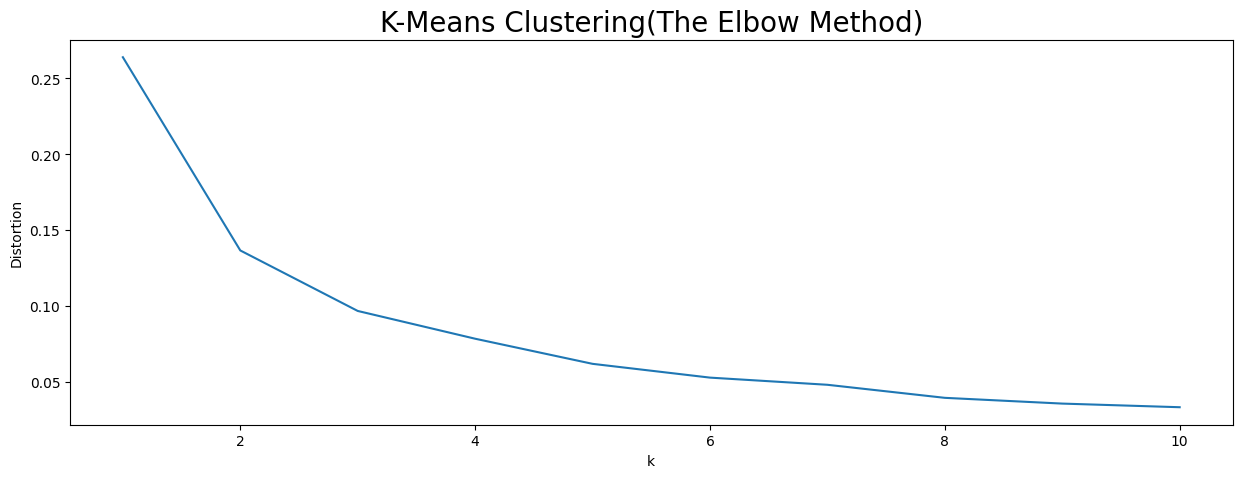

In [45]:
plt.figure(figsize=(15,5))
plt.plot(range(1, 11), distortions)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.show()

# Stampo la silhoutte migliore

In [48]:
silhoutte = [0]

for i in range(2,11):
    km_2 = TimeSeriesKMeans(n_clusters=i, metric="euclidean", max_iter=25,random_state=0)
    silhoutte.append(silhouette_score(allPixelNDVIPoly,km_2.fit_predict(allPixelNDVIPoly),metric="euclidean"))

# Stampo il grafico

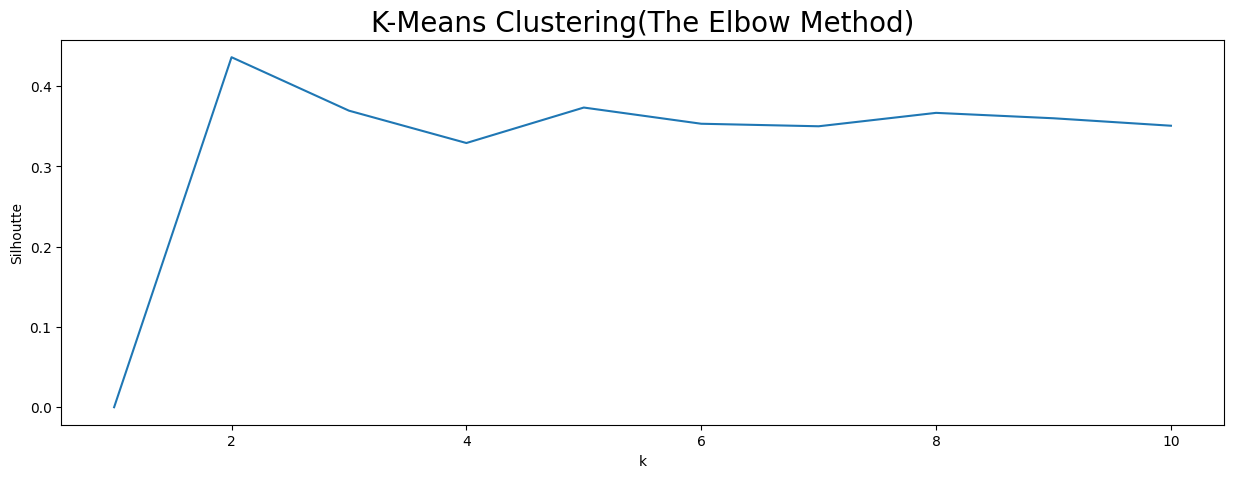

In [49]:
plt.figure(figsize=(15,5))
plt.plot(range(1, 11), silhoutte)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('k')
plt.ylabel('Silhoutte')
plt.show()